In [2]:
# Load libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# from kerastuner.tuners import BayesianOptimization


from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf



#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

# Ignore all GPUs, tf random forest does not benefit from it.
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

/home/dl_/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2022-08-03 15:11:50.633505: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-03 15:11:50.633547: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
df_btc = pd.read_csv('BTC-USD.csv', parse_dates=['dt'], dayfirst=True)
df_btc['dt'] = df_btc['dt'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
df_btc = df_btc[['dt','BTC_AdjClose']]
# df_btc = df_btc.set_index('dt')
df_btc.dtypes

dt              datetime64[ns]
BTC_AdjClose           float64
dtype: object

In [4]:
tickers = ['TSLA'#, 'AAPL'
            ]



df = pd.read_csv('combined_dataset_daily_sentiment_TSLA_AAPL.csv')
df['dt'] = df['dt'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
df = df.set_index('dt')

df = df[['TSLA_AdjClose', #'TSLA_Open', 'TSLA_High', 'TSLA_Low',
       'TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high', 'TSLA_14-low',
       'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P', 'DFF', 'DGS3MO',
       'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS', 'USEPUINDXD',
       'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E','sentiment_vader',
       'total_msgs']]

# set daterange for model
# end_date = '2021-08-01'

# df = df.loc[:end_date]
df.columns

Index(['TSLA_AdjClose', 'TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high',
       'TSLA_14-low', 'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P',
       'DFF', 'DGS3MO', 'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS',
       'USEPUINDXD', 'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E',
       'sentiment_vader', 'total_msgs'],
      dtype='object')

In [5]:
df

,TSLA_AdjClose,TSLA_Volume,AAPL_AdjClose,TSLA_14-high,TSLA_14-low,TSLA_%K,TSLA_%D,TSLA_%R,TSLA_RSI,S&P,...,DGS6MO,DGS10,BAMLH0A0HYM2,VXIBMCLS,USEPUINDXD,DCOILWTICO,TSLA_EPS_diluted,TSLA_P/E,sentiment_vader,total_msgs
dt,,,,,,,,,,,,,,,,,,,,,
2012-11-05,6.300000,10244500.0,17.928806,6.316000,5.372000,98.305106,88.586524,1.694894,65.094551,1417.26,...,0.15,1.72,5.57,19.64,225.43,85.64,-0.7440,-8.467742,0.0,0.0
2012-11-06,6.230000,11620000.0,17.874533,6.316000,5.404000,90.570181,88.485070,9.429819,62.733128,1428.39,...,0.15,1.78,5.49,19.60,195.50,88.62,-0.7440,-8.373656,0.0,0.0
2012-11-07,6.308000,8572500.0,17.190607,6.410000,5.404000,89.860859,92.912049,10.139141,64.287757,1394.53,...,0.14,1.68,5.63,20.49,358.00,84.50,-0.7440,-8.478495,0.0,0.0
2012-11-08,6.262000,6370000.0,16.566753,6.410000,5.404000,85.288295,88.573112,14.711705,62.628464,1377.51,...,0.15,1.62,5.67,20.85,241.14,85.07,-0.7440,-8.416667,0.0,0.0
2012-11-09,6.064000,4315000.0,16.853561,6.410000,5.404000,65.606391,80.251848,34.393609,55.936108,1379.85,...,0.15,1.61,5.77,20.82,278.07,86.08,-0.7440,-8.150538,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26,776.580017,22273600.0,151.600006,842.359985,675.099976,60.672029,75.098009,39.327971,57.026327,3921.05,...,3.06,2.81,5.06,25.24,30.93,99.83,8.3024,93.536811,0.0,0.0
2022-07-27,824.460022,29370000.0,156.789993,842.359985,675.099976,89.298121,75.937677,10.701879,63.699169,3921.05,...,3.06,2.81,5.06,25.24,30.93,99.83,8.3024,99.303818,0.0,0.0
2022-07-28,842.700012,28241000.0,157.350006,849.900024,675.099976,95.881001,81.950384,4.118999,65.873169,3921.05,...,3.06,2.81,5.06,25.24,30.93,99.83,8.3024,101.500772,0.0,0.0


In [6]:
# set daterange for model
end_date = '2021-08-30'

df2 = pd.merge(df, df_btc, how='outer', on='dt')
df2 = df2.set_index('dt')
df2['BTC_AdjClose'].replace(np.nan, 0, inplace=True)
df2 = df2.loc[:end_date]
df2.reindex()

,TSLA_AdjClose,TSLA_Volume,AAPL_AdjClose,TSLA_14-high,TSLA_14-low,TSLA_%K,TSLA_%D,TSLA_%R,TSLA_RSI,S&P,...,DGS10,BAMLH0A0HYM2,VXIBMCLS,USEPUINDXD,DCOILWTICO,TSLA_EPS_diluted,TSLA_P/E,sentiment_vader,total_msgs,BTC_AdjClose
dt,,,,,,,,,,,,,,,,,,,,,
2012-11-05,6.300000,10244500.0,17.928806,6.316000,5.372000,98.305106,88.586524,1.694894,65.094551,1417.26,...,1.72,5.57,19.64,225.43,85.64,-0.7440,-8.467742,0.0,0.0,0.00000
2012-11-06,6.230000,11620000.0,17.874533,6.316000,5.404000,90.570181,88.485070,9.429819,62.733128,1428.39,...,1.78,5.49,19.60,195.50,88.62,-0.7440,-8.373656,0.0,0.0,0.00000
2012-11-07,6.308000,8572500.0,17.190607,6.410000,5.404000,89.860859,92.912049,10.139141,64.287757,1394.53,...,1.68,5.63,20.49,358.00,84.50,-0.7440,-8.478495,0.0,0.0,0.00000
2012-11-08,6.262000,6370000.0,16.566753,6.410000,5.404000,85.288295,88.573112,14.711705,62.628464,1377.51,...,1.62,5.67,20.85,241.14,85.07,-0.7440,-8.416667,0.0,0.0,0.00000
2012-11-09,6.064000,4315000.0,16.853561,6.410000,5.404000,65.606391,80.251848,34.393609,55.936108,1379.85,...,1.61,5.77,20.82,278.07,86.08,-0.7440,-8.150538,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,701.159973,13214300.0,146.921646,729.900024,648.840027,64.544717,71.687598,35.455283,53.984633,4470.00,...,1.34,3.20,20.68,54.90,67.42,1.9191,365.358748,0.0,0.0,46942.21875
2021-08-27,711.919983,13833800.0,147.977219,729.900024,648.840027,77.818848,73.098073,22.181152,57.017706,4509.37,...,1.31,3.17,19.41,69.52,68.84,1.9191,370.965548,0.0,0.0,49058.66797
2021-08-28,711.919983,13833800.0,147.977219,729.900024,648.840027,77.818848,73.098073,22.181152,57.017706,4509.37,...,1.31,3.17,19.41,147.47,68.84,1.9191,370.965548,0.0,0.0,48902.40234


## Standardize Data

In [7]:
# scaler = StandardScaler().fit(df)
# scaled_data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index = df.index)
# scaled_data


In [8]:
df.columns

Index(['TSLA_AdjClose', 'TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high',
       'TSLA_14-low', 'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P',
       'DFF', 'DGS3MO', 'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS',
       'USEPUINDXD', 'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E',
       'sentiment_vader', 'total_msgs'],
      dtype='object')

In [9]:
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

#fit multiple linear regression model
model = ols("TSLA_AdjClose ~ AAPL_AdjClose", data=df).fit()
display(durbin_watson(model.resid))

#view model summary
print(model.summary())

0.012729401238700786

                            OLS Regression Results                            
Dep. Variable:          TSLA_AdjClose   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 3.347e+04
Date:                Wed, 03 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:11:52   Log-Likelihood:                -21054.
No. Observations:                3555   AIC:                         4.211e+04
Df Residuals:                    3553   BIC:                         4.212e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -140.1489      2.377    -58.949

## Lagged Returns

In [10]:
# lagged returns

return_period = 5

Y = np.log(df2[tickers[0]+'_AdjClose']).diff(return_period).shift(-return_period)

Y.name = Y.name +'_pred'

lagged_data_0 = [ tickers[0]+'_%K', tickers[0]+'_%D', tickers[0]+'_%R',tickers[0]+'_RSI']
lagged_data_14 = [tickers[0]+'_14-high', tickers[0]+'_14-low']

try:
    lagged_data_1 = [tickers[1]+'_14-high', tickers[1]+'_14-low', tickers[1]+'_%K', tickers[1]+'_%D', tickers[1]+'_%R', tickers[1]+'_RSI']
    lagged_data = lagged_data_0 + lagged_data_1
except:
    lagged_data = lagged_data_0

response_variables = [tickers[0]+'_AdjClose']

X1 = df2.loc[:, ~df2.columns.isin([*lagged_data, *response_variables])].select_dtypes(exclude='object')
X1_lagged = np.log(X1).shift(-return_period)
X2 = df2.loc[:, df2.columns.isin([*lagged_data_0])]
X2_lagged = np.log(X2/100)
X3 = df2.loc[:, df2.columns.isin([*lagged_data_14])]
X3_norm = np.log(X3)
X = pd.concat([X1_lagged, X2_lagged, X3_norm], axis=1)

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.replace(np.nan, 0, inplace=True)
Y.replace([np.inf, -np.inf], np.nan, inplace=True)
Y.replace(np.nan, 0, inplace=True)

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

In [11]:
dataset

,TSLA_AdjClose_pred,TSLA_Volume,AAPL_AdjClose,TSLA_14-high,TSLA_14-low,S&P,DFF,DGS3MO,DGS6MO,DGS10,...,TSLA_P/E,sentiment_vader,total_msgs,BTC_AdjClose,TSLA_%K,TSLA_%D,TSLA_%R,TSLA_RSI,TSLA_14-high,TSLA_14-low
dt,,,,,,,,,,,,,,,,,,,,,
2012-11-05,-0.038180,15.277608,2.824562,1.857859,1.687139,7.229730,-1.832581,-2.407946,-1.897120,0.476234,...,0.000000,0.0,0.0,0.000000,-0.017094,-0.121190,-4.077550,-0.429329,1.843086,1.681200
2012-11-10,0.016356,15.408819,2.784583,1.860041,1.687139,7.210324,-1.832581,-2.525729,-1.966113,0.457425,...,0.000000,0.0,0.0,0.000000,-0.421497,-0.220000,-1.067299,-0.580960,1.857859,1.687139
2012-11-15,0.068344,15.344281,2.849564,1.894617,1.729884,7.235482,-1.832581,-2.525729,-1.966113,0.506818,...,0.000000,0.0,0.0,0.000000,-0.294239,-0.177324,-1.366877,-0.573397,1.860041,1.687139
2012-11-20,-0.026717,14.581676,2.868268,1.901212,1.769173,7.250742,-1.832581,-2.302585,-1.966113,0.530628,...,0.000000,0.0,0.0,0.000000,-0.050773,-0.054995,-3.005679,-0.416595,1.894617,1.729884
2012-11-25,0.051262,15.775817,2.892094,1.925416,1.797079,7.255718,-1.832581,-2.525729,-2.040221,0.482426,...,0.000000,0.0,0.0,0.000000,-0.391076,-0.213370,-1.128027,-0.518998,1.901212,1.769173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10,0.010062,16.632804,5.000417,6.592908,6.441329,8.404696,-2.302585,-2.813411,-2.995732,0.254642,...,5.923457,0.0,0.0,10.758902,-0.186342,-0.215442,-1.771897,-0.469982,6.588844,6.441329
2021-08-15,-0.052838,16.512965,4.994295,6.592908,6.475186,8.398786,-2.407946,-2.995732,-2.995732,0.231112,...,5.870619,0.0,0.0,10.806474,-0.132391,-0.128901,-2.087458,-0.461912,6.592908,6.441329
2021-08-20,0.044479,16.352820,4.995442,6.592908,6.475186,8.410986,-2.407946,-2.813411,-2.813411,0.300105,...,5.915097,0.0,0.0,10.798775,-0.947746,-0.927374,-0.490392,-0.709786,6.592908,6.475186


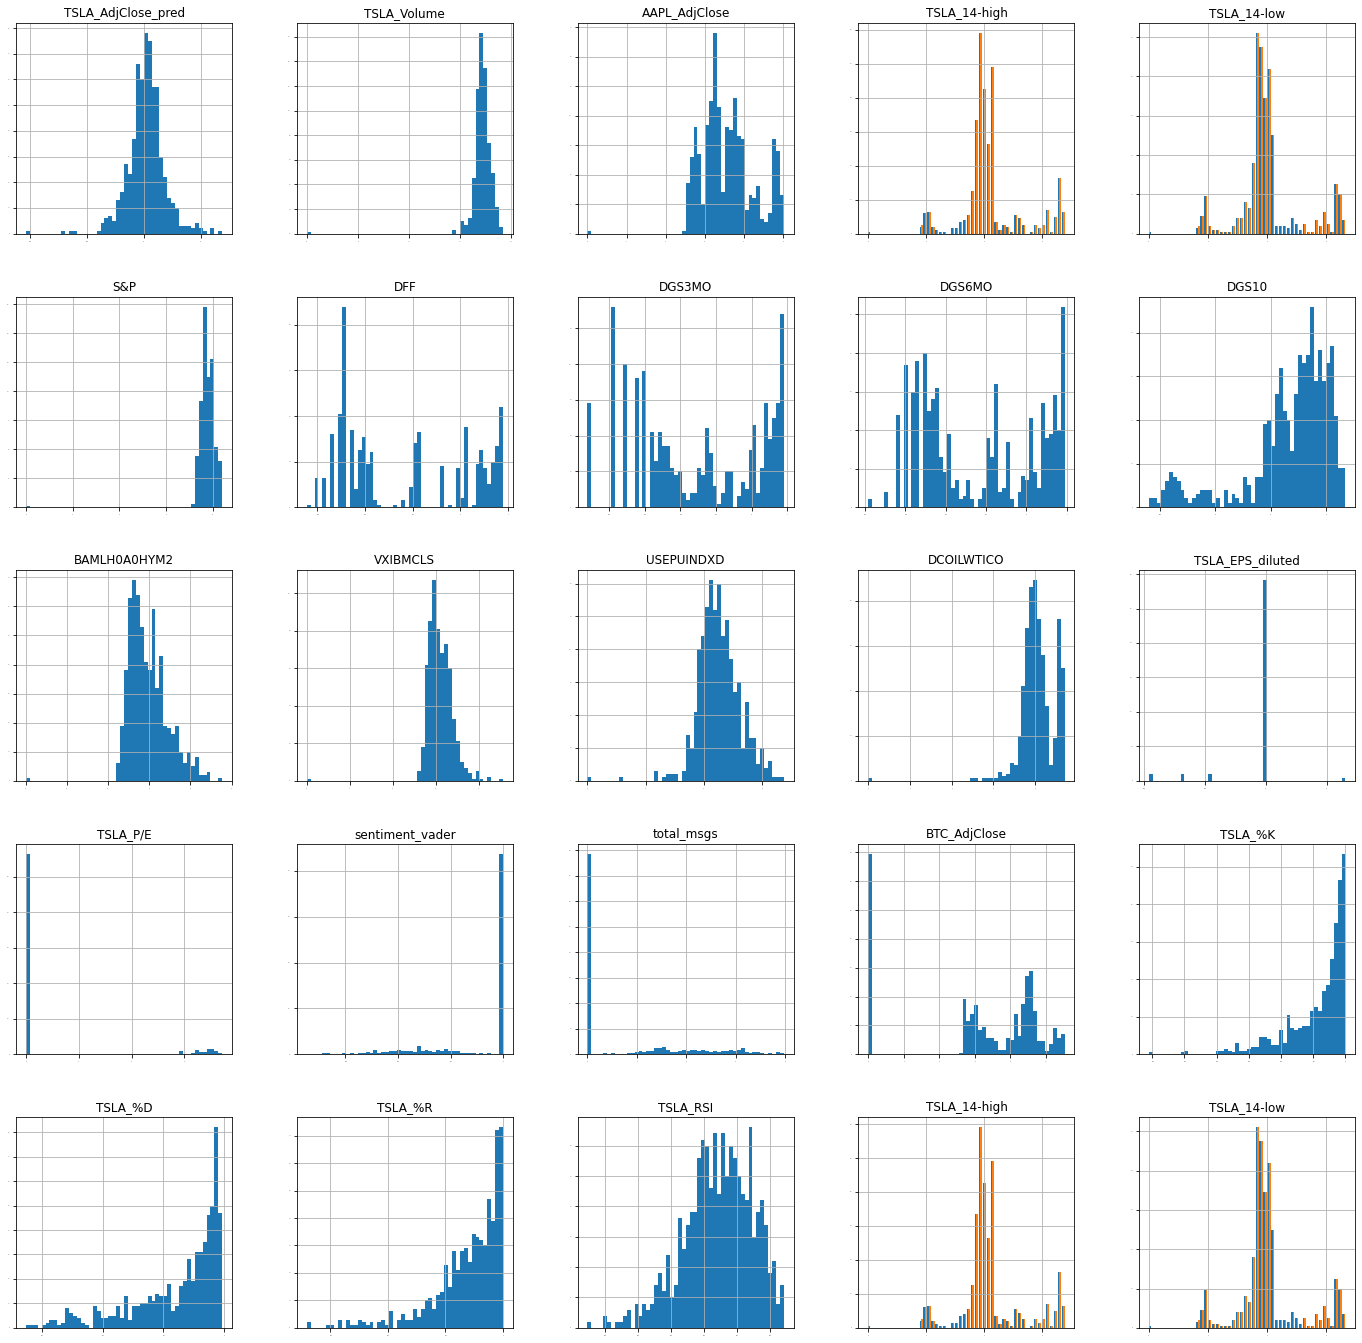

In [12]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(24,24))
pyplot.show();

<AxesSubplot:title={'center':'Correlation Matrix'}>

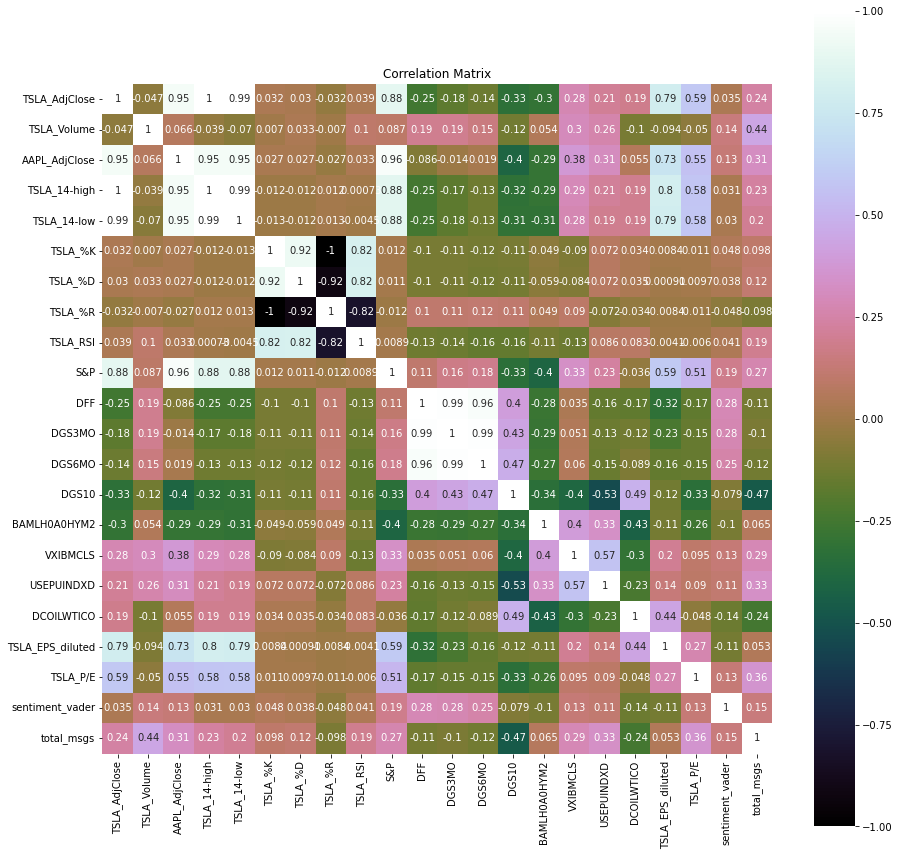

In [13]:
correlation = df.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

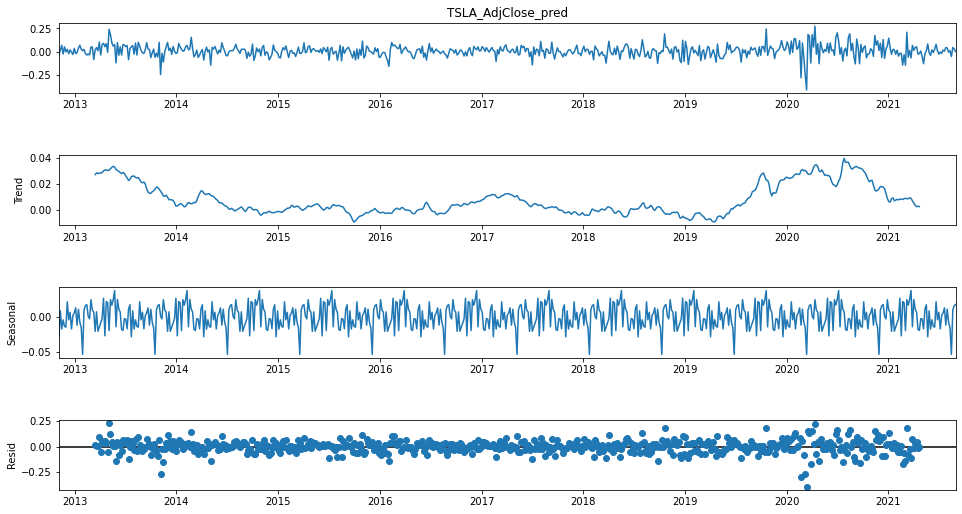

In [14]:
res = sm.tsa.seasonal_decompose(Y,  period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

In [15]:
dataset

,TSLA_AdjClose_pred,TSLA_Volume,AAPL_AdjClose,TSLA_14-high,TSLA_14-low,S&P,DFF,DGS3MO,DGS6MO,DGS10,...,TSLA_P/E,sentiment_vader,total_msgs,BTC_AdjClose,TSLA_%K,TSLA_%D,TSLA_%R,TSLA_RSI,TSLA_14-high,TSLA_14-low
dt,,,,,,,,,,,,,,,,,,,,,
2012-11-05,-0.038180,15.277608,2.824562,1.857859,1.687139,7.229730,-1.832581,-2.407946,-1.897120,0.476234,...,0.000000,0.0,0.0,0.000000,-0.017094,-0.121190,-4.077550,-0.429329,1.843086,1.681200
2012-11-10,0.016356,15.408819,2.784583,1.860041,1.687139,7.210324,-1.832581,-2.525729,-1.966113,0.457425,...,0.000000,0.0,0.0,0.000000,-0.421497,-0.220000,-1.067299,-0.580960,1.857859,1.687139
2012-11-15,0.068344,15.344281,2.849564,1.894617,1.729884,7.235482,-1.832581,-2.525729,-1.966113,0.506818,...,0.000000,0.0,0.0,0.000000,-0.294239,-0.177324,-1.366877,-0.573397,1.860041,1.687139
2012-11-20,-0.026717,14.581676,2.868268,1.901212,1.769173,7.250742,-1.832581,-2.302585,-1.966113,0.530628,...,0.000000,0.0,0.0,0.000000,-0.050773,-0.054995,-3.005679,-0.416595,1.894617,1.729884
2012-11-25,0.051262,15.775817,2.892094,1.925416,1.797079,7.255718,-1.832581,-2.525729,-2.040221,0.482426,...,0.000000,0.0,0.0,0.000000,-0.391076,-0.213370,-1.128027,-0.518998,1.901212,1.769173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-10,0.010062,16.632804,5.000417,6.592908,6.441329,8.404696,-2.302585,-2.813411,-2.995732,0.254642,...,5.923457,0.0,0.0,10.758902,-0.186342,-0.215442,-1.771897,-0.469982,6.588844,6.441329
2021-08-15,-0.052838,16.512965,4.994295,6.592908,6.475186,8.398786,-2.407946,-2.995732,-2.995732,0.231112,...,5.870619,0.0,0.0,10.806474,-0.132391,-0.128901,-2.087458,-0.461912,6.592908,6.441329
2021-08-20,0.044479,16.352820,4.995442,6.592908,6.475186,8.410986,-2.407946,-2.813411,-2.813411,0.300105,...,5.915097,0.0,0.0,10.798775,-0.947746,-0.927374,-0.490392,-0.709786,6.592908,6.475186


In [16]:
# fig, axs = plt.subplots(1,1, figsize=(12,8))

# axs.plot( dataset['TSLA_AdjClose_pred'], label = "actual value", color = 'blue' )
# #axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "LR predicted value", color = 'red', marker='D')
# axs.plot( dataset['TSLA_%K'], label = "LSTM predicted value", color = 'green')

# axs.set( 
#        xlabel='Date', 
#        ylabel='percentage change in 5 days',
#        title='Feature engineering')
# axs.xaxis.label.set_size(15)
# axs.yaxis.label.set_size(15)
# axs.yaxis.label.set_size(15)

# axs.title.set_size(15)

In [17]:
# dataset.to_csv('dataset_tsla_aapl.csv')

In [18]:
end_date = '2021-07-05'



X = X.loc[:end_date]

Y = Y.loc[:end_date]
dataset = dataset.loc[:end_date]

In [19]:
X.shape

(633, 28)

In [20]:
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best features

,Score
Specs,
DGS10,7.620062
DFF,3.189416
VXIBMCLS,2.997578
USEPUINDXD,2.571015
TSLA_Volume,2.366126
total_msgs,1.839248
TSLA_RSI,1.541056
TSLA_EPS_diluted,1.481475
BTC_AdjClose,1.439718


# Based on best features, we drop TSLA_high, low, and open

In [21]:
# X = X.loc[:, ~X.columns.isin([''])].select_dtypes(exclude='object')

In [22]:
validation_size = 0.05

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [23]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

In [24]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
# models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(max_depth=5
)))
models.append(('SVR', SVR()))

In [25]:
# Boosting methods
# models.append(('ABR', AdaBoostRegressor()))
# models.append(('GBR', GradientBoostingRegressor()))

# Bagging methods
models.append(('RFR', RandomForestRegressor(max_depth=5
)))
models.append(('ETR', ExtraTreesRegressor(max_depth=5
)))

In [26]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds) #, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    

    print(f'{name: <10} cv_mean: {cv_results.mean():.3f}, cv_std: {cv_results.std():.3f}, train: {train_result:.3f}, test: {test_result:.3f}')

LR         cv_mean: 0.003, cv_std: 0.002, train: 0.003, test: 0.009
LASSO      cv_mean: 0.004, cv_std: 0.003, train: 0.004, test: 0.005
KNN        cv_mean: 0.008, cv_std: 0.011, train: 0.003, test: 0.007
CART       cv_mean: 0.014, cv_std: 0.028, train: 0.003, test: 0.006
SVR        cv_mean: 0.005, cv_std: 0.003, train: 0.004, test: 0.007
RFR        cv_mean: 0.005, cv_std: 0.005, train: 0.003, test: 0.006
ETR        cv_mean: 0.005, cv_std: 0.004, train: 0.003, test: 0.007


In [27]:
from sklearn import tree
regr = tree.DecisionTreeRegressor()
model = regr.fit(X_train, Y_train)
text_representation = tree.export_text(regr)
print(text_representation)

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, 
#                    feature_names=iris.feature_names,  
#                    class_names=iris.target_names,
#                    filled=True)

|--- feature_12 <= 4.23
|   |--- feature_18 <= 6.36
|   |   |--- feature_12 <= 3.95
|   |   |   |--- feature_18 <= 6.31
|   |   |   |   |--- feature_27 <= 3.35
|   |   |   |   |   |--- feature_0 <= 18.76
|   |   |   |   |   |   |--- feature_21 <= -0.08
|   |   |   |   |   |   |   |--- feature_22 <= -0.07
|   |   |   |   |   |   |   |   |--- feature_0 <= 17.59
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 2.60
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 16.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  16.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- feature_1 >  2.60
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 2.88
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  2.88
|   |   |   |   |   |   |   |   | 

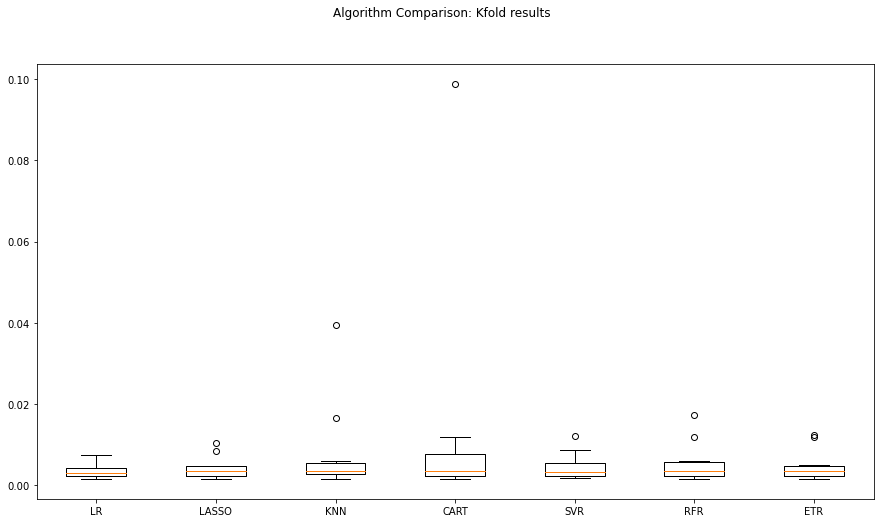

In [28]:

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

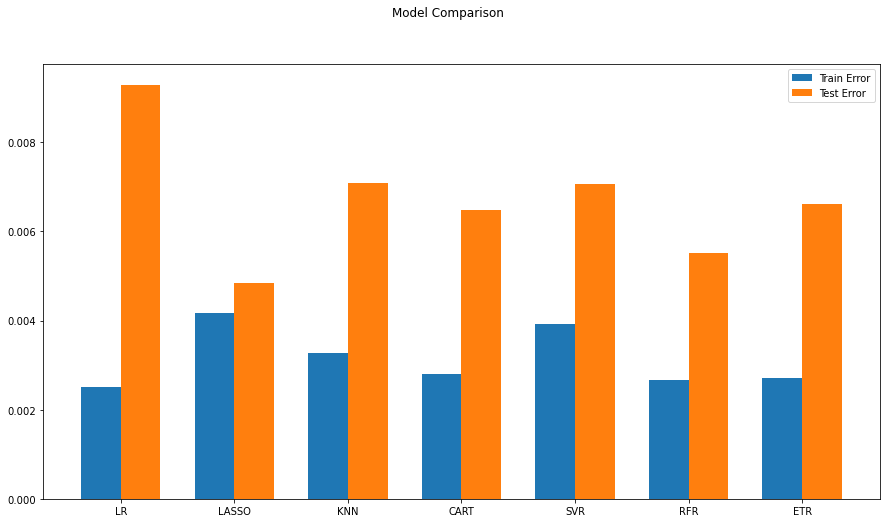

In [29]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

# First ARIMA Model

In [30]:
X_train_ARIMA=X_train.loc[:, [
       #'TSLA_Open', 'TSLA_High', 'TSLA_Low',
       'TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high', 'TSLA_14-low',
       'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P', 'DFF', 'DGS3MO',
       'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS', 'USEPUINDXD',
       'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E','sentiment_vader',
       'total_msgs']]
X_test_ARIMA=X_test.loc[:, [
       #'TSLA_Open', 'TSLA_High', 'TSLA_Low',
       'TSLA_Volume', 'AAPL_AdjClose', 'TSLA_14-high', 'TSLA_14-low',
       'TSLA_%K', 'TSLA_%D', 'TSLA_%R', 'TSLA_RSI', 'S&P', 'DFF', 'DGS3MO',
       'DGS6MO', 'DGS10', 'BAMLH0A0HYM2', 'VXIBMCLS', 'USEPUINDXD',
       'DCOILWTICO', 'TSLA_EPS_diluted', 'TSLA_P/E','sentiment_vader',
       'total_msgs']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [31]:
modelARIMA=sm.tsa.ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

In [32]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

0.009546995902460418

In [33]:
test_results.append(error_Test_ARIMA)
train_results.append(error_Training_ARIMA)
names.append("ARIMA")


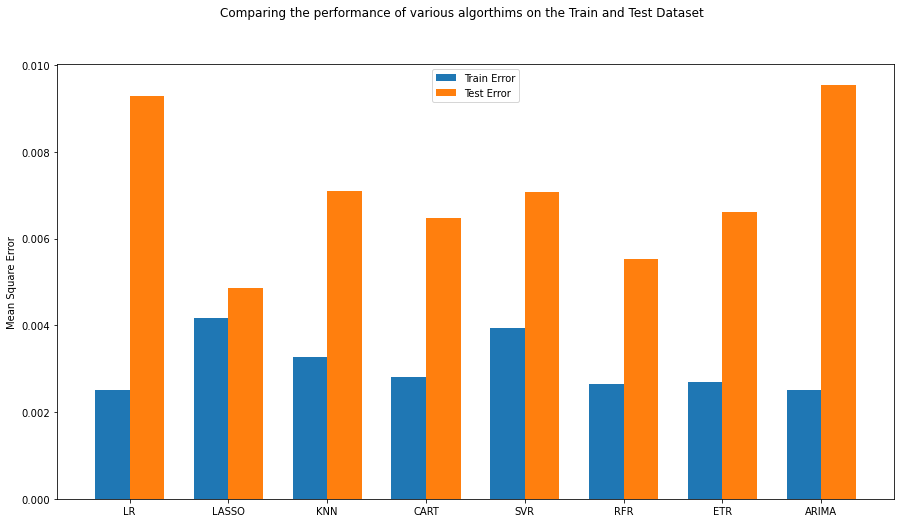

In [34]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

# LSTM and Time Series Based Models

In [35]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [36]:
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, #validation_data=(X_test_LSTM, Y_test_LSTM)
                validation_split=0.5,epochs=330, batch_size=72, verbose=0, shuffle=False)

2022-08-03 15:12:04.356980: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-03 15:12:04.357011: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-03 15:12:04.357027: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-LJ3SJ1H): /proc/driver/nvidia/version does not exist
2022-08-03 15:12:04.357169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


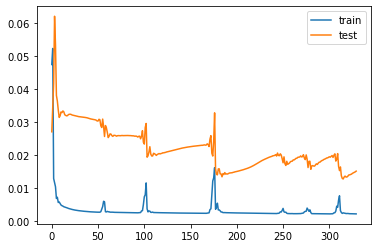

In [37]:
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [38]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

1/1 [==============================] - 0s 11ms/step


In [39]:
test_results.append(error_Test_LSTM)
train_results.append(error_Training_LSTM)
names.append("LSTM")

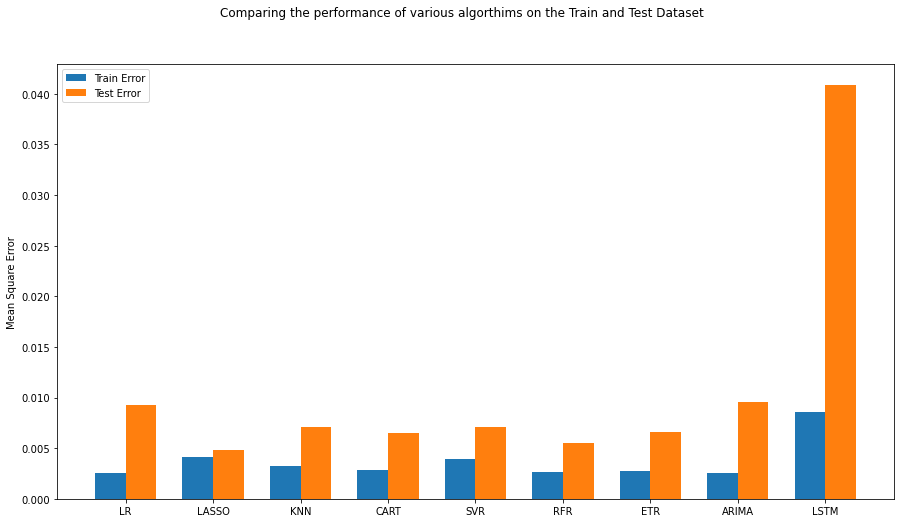

In [40]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

In [41]:
test_results

[0.009293484259228532,
 0.004848399627421507,
 0.007090962833889892,
 0.006469291039250078,
 0.007074333038542134,
 0.005519450467279655,
 0.006614864903958294,
 0.009546995902460418,
 0.04089855658300086]

# Tune ARIMA Model

In [42]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')
#Grid Search for ARIMA Model
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=sm.tsa.ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
#warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values) 

ARIMA(0, 0, 0) MSE=0.0025124
ARIMA(0, 0, 1) MSE=0.0025046
ARIMA(0, 1, 0) MSE=0.0612995
ARIMA(0, 1, 1) MSE=0.0501192
ARIMA(1, 0, 0) MSE=0.0025044
ARIMA(1, 0, 1) MSE=0.0025114
ARIMA(1, 1, 0) MSE=0.0572773
ARIMA(1, 1, 1) MSE=0.0485456
ARIMA(2, 0, 0) MSE=0.0025037
ARIMA(2, 0, 1) MSE=0.0025122
ARIMA(2, 1, 0) MSE=0.0574455
ARIMA(2, 1, 1) MSE=0.0542901
Best ARIMA(2, 0, 0) MSE=0.0025037


In [43]:
# prepare model
modelARIMA_tuned=sm.tsa.ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,0])
model_fit_tuned = modelARIMA_tuned.fit()

In [44]:
# estimate accuracy on validation set
predicted_tuned = model_fit_tuned.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

0.009617635965499773


In [45]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit_tuned.fittedvalues)
predicted = model_fit_tuned.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

0.009617635965499773

In [46]:
test_results.append(error_Test_ARIMA)
train_results.append(error_Training_ARIMA)
names.append("ARIMA_tuned")


In [47]:
len(train_results)

10

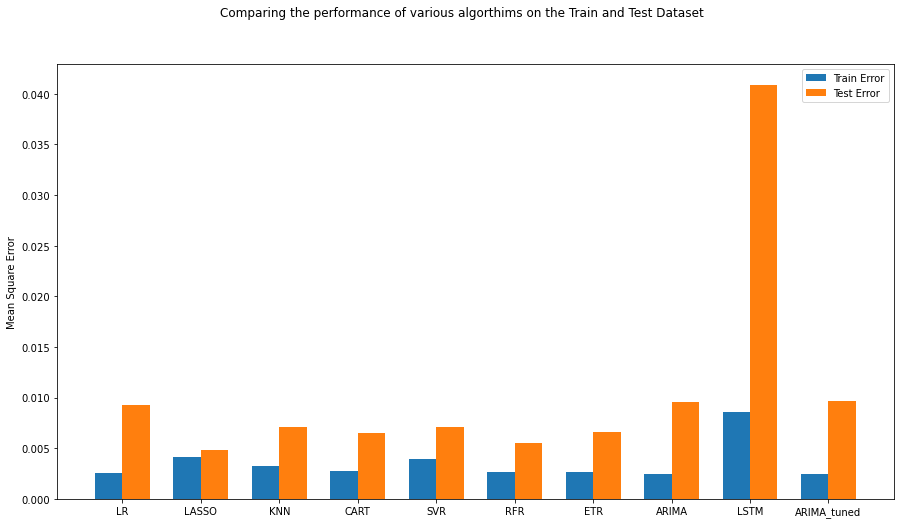

In [48]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

# LR Model - Stock, lagged return plots

In [49]:
 # Full Training period linear model
    
LRtest = LinearRegression().fit(X_train, Y_train)
train_result = mean_squared_error(LRtest.predict(X_train), Y_train)
# train_results.append(train_result)
    
# Test results
test_result = mean_squared_error(LRtest.predict(X_test), Y_test)



In [50]:
LRtest.coef_

array([-0.00417254,  0.02007297,  0.39685403, -0.36644656,  0.18733865,
       -0.23537181,  0.20424196, -0.0118134 ,  0.00447359, -0.01065719,
        0.01922132,  0.02382523, -0.02502691,  0.00790986, -0.00085195,
        0.05834071,  0.00638517,  0.00184077, -0.00705978, -0.00080688,
       -0.01088535, -0.00253158,  0.01126153, -0.02650327,  0.39685403,
       -0.36644656,  0.18733865, -0.23537181])

In [51]:
LRtest.intercept_

-1.4762107357962078

In [52]:
res_LR = LRtest.predict(X_test)

In [53]:
s = Y_test.to_frame()
s['LM_predicted'] = res_LR
s

,TSLA_AdjClose_pred,LM_predicted
dt,,
2021-01-27,-0.028582,-0.001138
2021-02-01,0.014681,0.030549
2021-02-06,-0.048775,0.016932
2021-02-11,-0.019206,0.035159
2021-02-16,-0.018916,0.044880
2021-02-21,-0.145506,-0.028915
2021-02-26,-0.033570,0.023998
2021-03-03,-0.148604,-0.008691
2021-03-08,0.208803,0.059827


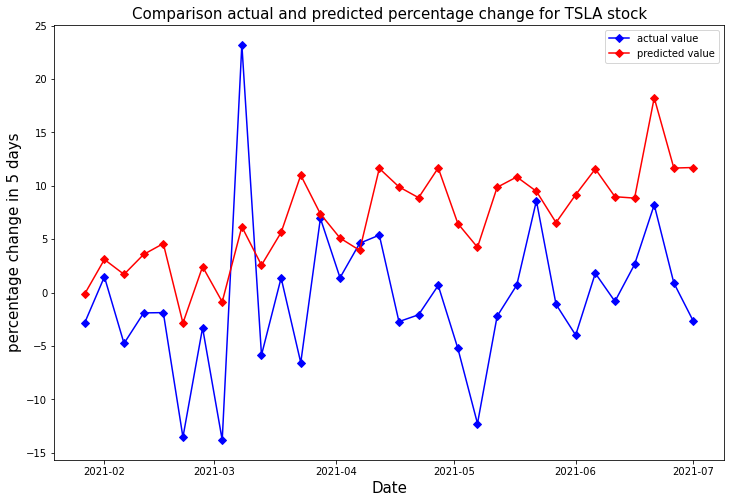

In [54]:
fig, axs = plt.subplots(1,1, figsize=(12,8))

axs.plot( (np.exp(s['TSLA_AdjClose_pred'])-1)*100, label = "actual value", color = 'blue', marker='D')
axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "predicted value", color = 'red', marker='D')

axs.set( 
       xlabel='Date', 
       ylabel='percentage change in 5 days',
       title=f'Comparison actual and predicted percentage change for {tickers[0]} stock')
axs.legend()
axs.xaxis.label.set_size(15)
axs.yaxis.label.set_size(15)
axs.yaxis.label.set_size(15)

axs.title.set_size(15)

# LSTM Model - Stock, lagged return plots

In [55]:
res_LSTM = LSTMModel.predict(X_test_LSTM)
# res_LSTM.tolist() # works for javier.

1/1 [==============================] - 0s 10ms/step


In [56]:
s['LSTM_predicted'] = res_LSTM
s

,TSLA_AdjClose_pred,LM_predicted,LSTM_predicted
dt,,,
2021-01-27,-0.028582,-0.001138,-0.237678
2021-02-01,0.014681,0.030549,-0.270895
2021-02-06,-0.048775,0.016932,-0.255112
2021-02-11,-0.019206,0.035159,-0.234881
2021-02-16,-0.018916,0.044880,-0.254192
2021-02-21,-0.145506,-0.028915,-0.249269
2021-02-26,-0.033570,0.023998,-0.242217
2021-03-03,-0.148604,-0.008691,-0.235002
2021-03-08,0.208803,0.059827,-0.220894


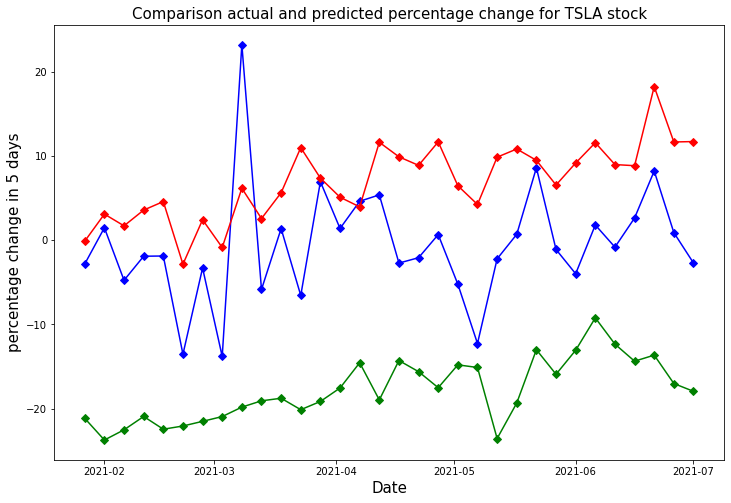

In [57]:
fig, axs = plt.subplots(1,1, figsize=(12,8))

axs.plot( (np.exp(s['TSLA_AdjClose_pred'])-1)*100, label = "actual value", color = 'blue', marker='D')
axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "LR predicted value", color = 'red', marker='D')
axs.plot( (np.exp(s['LSTM_predicted'])-1)*100, label = "LSTM predicted value", color = 'green', marker='D')

axs.set( 
       xlabel='Date', 
       ylabel='percentage change in 5 days',
       title=f'Comparison actual and predicted percentage change for {tickers[0]} stock')
axs.xaxis.label.set_size(15)
axs.yaxis.label.set_size(15)
axs.yaxis.label.set_size(15)

axs.title.set_size(15)

# LSTM with hyperparameter tuning


In [58]:
def buildmodel(layer, densenumber, denselayersize, optimizer, dropoutrate):

    layer1 = tf.keras.layers.Input(shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])) #seq length, input size
    # layer2 = tf.keras.layers.Embedding(input_dim=6,output_dim=64,input_length= 15000)(layer1)
    layerX = tf.keras.layers.LSTM(50, activation = 'relu') (layer1)
    for f in range(densenumber):
        layer6 = tf.keras.layers.Dense(denselayersize,activation="relu")(layerX)
        layer7 = tf.keras.layers.Dropout(dropoutrate)(layer6)
        layerX = tf.keras.layers.BatchNormalization()(layer7)
    output = tf.keras.layers.Dense(1, activation="linear" )(layerX)
    model = tf.keras.Model(inputs=layer1,outputs=output)
    model.compile(loss=["MSE"],optimizer=optimizer) 
    return model

In [59]:
dictionary =  dict(layer1= [ "LSTM"], 
                  densenumber = [2, 4, 6, 8],
                  denselayersize = [8, 16, 32, 64],
                  optimizer =["adam", "rmsprop", "SGD"],
                  dropoutrate = [0.2, 0.4, 0.8]
                  )

In [60]:
iterate = 0
model_dict = {}
for layer in dictionary["layer1"]:
    for densenumber in dictionary["densenumber"]:
        for denselayersize in dictionary["denselayersize"]:
            for optimizer in dictionary["optimizer"]:
                for dropoutrate in dictionary["dropoutrate"]:
                    tf.keras.backend.clear_session()
                    tf.random.set_seed(1)

                    model= buildmodel(layer, densenumber, denselayersize, optimizer, dropoutrate)
                    
                    model_history = model.fit(X_train_LSTM, Y_train_LSTM, #validation_data=(X_test_LSTM, Y_test_LSTM)
                                            validation_split = 0.5,epochs=80, batch_size=72, verbose=0, shuffle=False)
                    predictions=model.predict(X_test_LSTM)
                    # y_val = Y_test_LSTM
                    # predictions2 = pd.DataFrame(predictions)                        
                    
                    # Y_3 = pd.DataFrame(y_val)
                    # correlation = pd.concat([Y_3, predictions2], axis=1).corr('spearman').iloc[0,1]

                    hist = model_history.history
                    error_Training_LSTM = mean_squared_error(Y_train_LSTM, model.predict(X_train_LSTM))
                    predicted = model.predict(X_test_LSTM)
                    error_Test_LSTM = mean_squared_error(Y_test, predicted)
                    
                    # test_loss = model.evaluate(car_test_features_norm[features], car_test_labels, verbose=0)
                    test_rmse = np.sqrt(error_Test_LSTM)
                    
                    model_dict[iterate]= dict(layer= layer, densenumber = densenumber, denselayersize=denselayersize, optimizer= optimizer,dropoutrate= dropoutrate, 
                    predictions = predictions, history = hist, MSE_Training = error_Training_LSTM, MSE_Test = error_Test_LSTM, RMSE_Test = test_rmse
                    )
                    iterate += 1    

                    
                   
              
        

1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 13ms/step


In [64]:
model_pd = pd.DataFrame(model_dict).transpose().sort_values(by="MSE_Test")

In [66]:
model_pd[['layer','densenumber','denselayersize','optimizer','dropoutrate','MSE_Training','MSE_Test']]

,layer,densenumber,denselayersize,optimizer,dropoutrate,MSE_Training,MSE_Test
67,LSTM,4,64,rmsprop,0.4,0.004326,0.004295
65,LSTM,4,64,adam,0.8,0.004536,0.004424
15,LSTM,2,16,SGD,0.2,0.005137,0.004495
69,LSTM,4,64,SGD,0.2,0.004423,0.004498
8,LSTM,2,8,SGD,0.8,0.004208,0.004505
...,...,...,...,...,...,...,...
37,LSTM,4,8,adam,0.4,0.056795,0.057482
27,LSTM,2,64,adam,0.2,0.021731,0.129865
46,LSTM,4,16,adam,0.4,0.030892,0.144176
36,LSTM,4,8,adam,0.2,0.177115,0.192829


In [ ]:
model_pd.sort_values(by="MSE_Test")

In [ ]:
best_model_predictions = model_pd.iloc[37]['predictions']
best_model_predictions

In [ ]:
# model_pd.to_csv('lstm_hyperparameter_tuning.csv')

In [ ]:
for count, model in enumerate(model_dict): # should be model_dict
    x_arr = np.arange(len(model_dict[model]['history']['loss'])) + 1

    fig = plt.figure(figsize=(16, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, model_dict[model]['history']['loss'], '-o', label='Train loss')
    ax.plot(x_arr, model_dict[model]['history']['val_loss'], '--<', label='Validation loss')
    ax.set_title(label= (f"#: {count} dense: {model_dict[model]['densenumber']}, denselayersize: {model_dict[model]['denselayersize']}, optimizer: {model_dict[model]['optimizer']}, dropout: {model_dict[model]['dropoutrate']}"))
    ax.legend(fontsize=10)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)

    # plt.savefig(f'{model}.png')

    # ax = fig.add_subplot(1, 2, 2)
    # ax.plot(x_arr, model['history']['MSE_Training'], '-o', label='Train acc.')
    # ax.plot(x_arr, model['history']['MSE_Test'], '--<', label='Validation acc.')
    # ax.legend(fontsize=15)
    # ax.set_xlabel('Epoch', size=15)
    # ax.set_ylabel('Accuracy', size=15)
    # plt.show()


# Use Parameters from Tuning

In [67]:
tf.keras.backend.clear_session()
tf.random.set_seed(1)
LSTM_tuned = buildmodel(layer=[ "LSTM"], densenumber=4, denselayersize=64, optimizer='rmsprop', dropoutrate=0.4)

In [68]:
model_history_tuned = LSTM_tuned.fit(X_train_LSTM, Y_train_LSTM, #validation_data=(X_test_LSTM, Y_test_LSTM)
                                            validation_split = 0.5,epochs=80, batch_size=72, verbose=0, shuffle=False)
predictions_tuned = LSTM_tuned.predict(X_test_LSTM)
# y_val = Y_test_LSTM
# predictions2 = pd.DataFrame(predictions)                        

# Y_3 = pd.DataFrame(y_val)
# correlation = pd.concat([Y_3, predictions2], axis=1).corr('spearman').iloc[0,1]

hist_LSTM_tuned = model_history_tuned.history
error_Training_LSTM_tuned = mean_squared_error(Y_train_LSTM, LSTM_tuned.predict(X_train_LSTM))
predicted_LSTM_tuned = LSTM_tuned.predict(X_test_LSTM)
error_Test_LSTM_tuned = mean_squared_error(Y_test, predicted)

# test_loss = model.evaluate(car_test_features_norm[features], car_test_labels, verbose=0)
test_rmse_LSTM_tuned= np.sqrt(error_Test_LSTM_tuned)

1/1 [==============================] - 0s 12ms/step


In [69]:
predictions_tuned

array([[-0.03064647],
       [-0.01636474],
       [-0.02229575],
       [-0.02495533],
       [-0.01528767],
       [-0.01738651],
       [-0.01800048],
       [-0.02107024],
       [-0.00877144],
       [-0.00839131],
       [-0.01122422],
       [-0.00655604],
       [-0.00877311],
       [-0.01052022],
       [-0.011363  ],
       [-0.00602959],
       [-0.00927912],
       [-0.01338334],
       [-0.00924314],
       [-0.01225671],
       [-0.01559512],
       [-0.01223695],
       [-0.00481373],
       [-0.0076411 ],
       [-0.00990836],
       [-0.00693691],
       [-0.01264947],
       [-0.01310575],
       [-0.01381342],
       [-0.00510243],
       [-0.00190647],
       [-0.00508878]], dtype=float32)

In [70]:
LSTM_tuned.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 28)]           0         
                                                                 
 lstm (LSTM)                 (None, 50)                15800     
                                                                 
 dense (Dense)               (None, 64)                3264      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                             

In [ ]:
s['LSTM_tuned_predicted'] = predictions_tuned
s

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12,8))

axs.plot( (np.exp(s['TSLA_AdjClose_pred'])-1)*100, label = "actual value", color = 'blue', marker='D')
axs.plot( (np.exp(s['LM_predicted'])-1)*100, label = "LR predicted value", color = 'red', marker='D')
axs.plot( (np.exp(s['LSTM_predicted'])-1)*100, label = "LSTM predicted value", color = 'green', marker='D')
axs.plot( (np.exp(s['LSTM_tuned_predicted'])-1)*100, label = "LSTM tuned predicted value", color = 'black', marker='D')


axs.set( 
       xlabel='Date', 
       ylabel='percentage change in 5 days',
       title=f'Comparison actual and predicted percentage change for {tickers[0]} stock')
axs.xaxis.label.set_size(15)
axs.yaxis.label.set_size(15)
axs.yaxis.label.set_size(15)

axs.title.set_size(15)

In [ ]:
test_results

In [ ]:
error_Training_LSTM_tuned

In [ ]:
test_results.append(error_Test_LSTM_tuned)
train_results.append(error_Training_LSTM_tuned)
names.append("LSTM_tuned")


In [ ]:
len(test_results)

In [ ]:
len(train_results)

In [ ]:
len(names)

In [ ]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

In [ ]:
Y_test

In [ ]:
return_period = 5

baseline_pred = Y_test.diff(return_period).shift(return_period) #.dropna(inplace=True)
baseline_test = Y_test.diff(return_period)
baseline_pred

# base_line = mean_squared_error(baseline_pred, baseline_test)
# base_line

In [ ]:
baseline_df = pd.DataFrame(baseline_test).merge(baseline_pred, on='dt',how='outer')
baseline_df.dropna(inplace=True)
baseline_df

In [ ]:
base_line = mean_squared_error(baseline_df['TSLA_AdjClose_pred_x'], baseline_df['TSLA_AdjClose_pred_y'])

In [ ]:
base_line